## 一层和两层Relu函数的神经网络的函数拟合效果

### 定义拟合函数

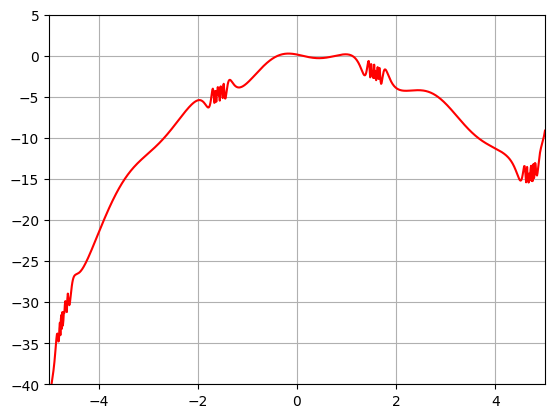

In [54]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def f(x):
    return np.sin(np.tan(x)) + 0.5 * x + np.cos(x) ** 2 - x ** 2 - np.sin(3 * x) * np.cos(x) + np.tan(0.3 * x) + np.random.normal(0, 0.5)

x = np.linspace(-5, 5, 1000)
y = f(x)

plt.axis([-5, 5, -40, 5])
plt.plot(x, y, 'r')
plt.grid()
plt.show()

### 定义绘图曲线

In [57]:
def plot_learning_curves(model, X, y):
    # 设置一下学习率
    history = model.fit(X, y, epochs=1500, verbose=0)
    plt.plot(np.sqrt(history.history['loss']), 'r-', linewidth=2, label='train')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()

### 一层Relu

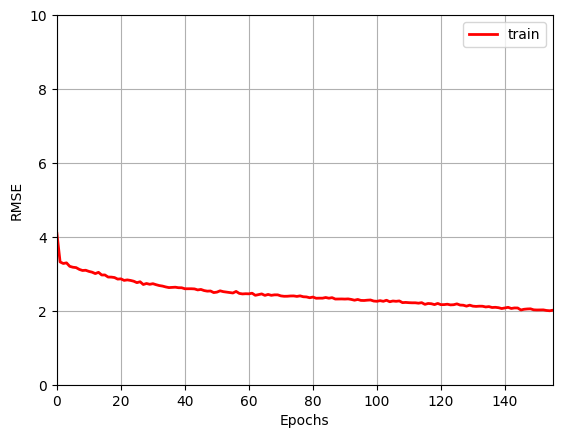

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_dim=1, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001), metrics=['mean_squared_error'])
plot_learning_curves(model, x, y)
plt.axis([0, 155, 0, 10])
plt.show()

32/32 [==============================] - 0s 613us/step


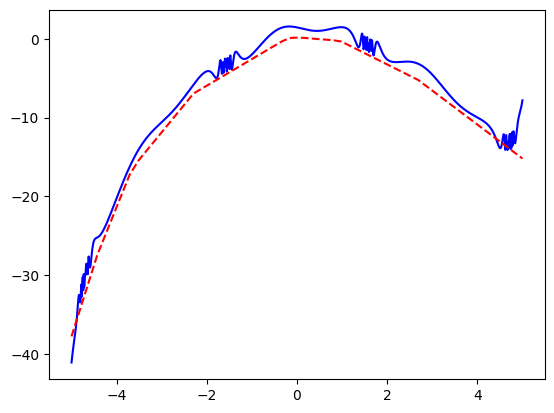

In [61]:
# 再写个测试集和测试效果
x_test = np.linspace(-5, 5, 1000)
y_test = f(x_test)
y_pred = model.predict(x_test)
plt.plot(x_test, y_test, 'b-')
plt.plot(x_test, y_pred, 'r--')
plt.grid
plt.show()

### 两层Relu

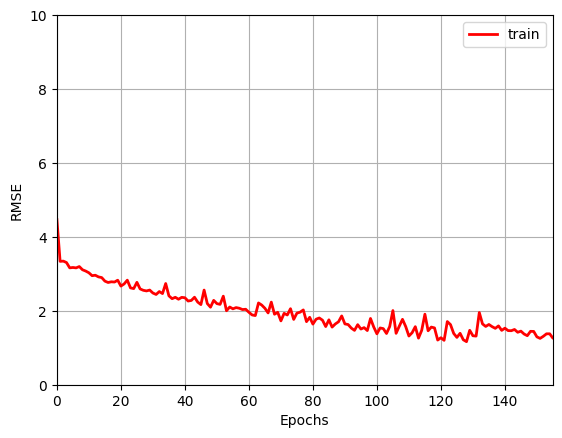

In [62]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_dim=1, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(50, input_dim=1, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001), metrics=['mean_squared_error'])

plot_learning_curves(model_2, x, y)
plt.axis([0, 155, 0, 10])
plt.show()

32/32 [==============================] - 0s 613us/step


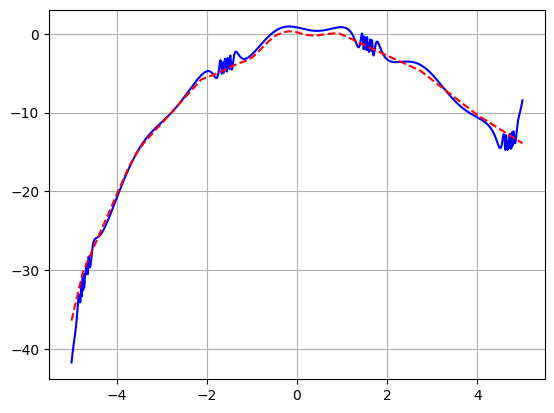

In [63]:
# 再写个测试集和测试效果
x_test = np.linspace(-5, 5, 1000)
y_test = f(x_test)
y_pred = model_2.predict(x_test)
plt.plot(x_test, y_test, 'b-')
plt.plot(x_test, y_pred, 'r--')
plt.grid()
plt.show()

## 用pytorch尝试了对较规律的周期函数的拟合效果

对于周期函数，可以设置训练集和测试集来进行效果的检验。

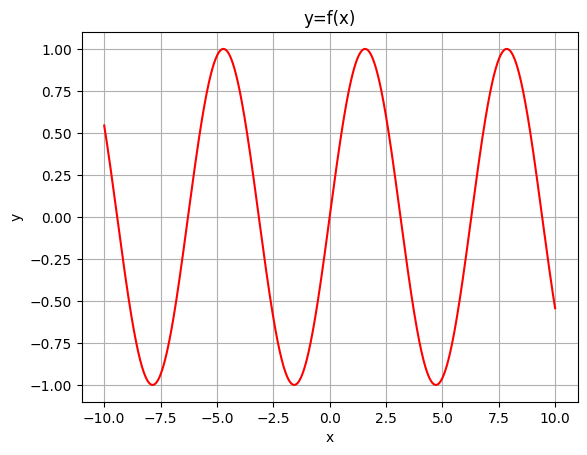

In [44]:
import torch
import torch.nn as nn

x = np.arange(-10, 10, 0.001)
y = np.sin(x)
plt.plot(x, y, 'r-')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.show()

### 设置数据集

In [45]:
x_train = np.arange(-10, 10, 0.001)
x_val = np.arange(1, 8, 0.001)
x_test = np.arange(-10, 10, 0.001)

y_train = np.sin(x_train)
y_val = np.sin(x_val)
y_test = np.sin(x_test)

x_train = torch.Tensor(x_train)
x_val = torch.Tensor(x_val)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train)
y_val = torch.Tensor(y_val)
y_test = torch.Tensor(y_test)


x_train = torch.unsqueeze(x_train, dim=1)
x_val = torch.unsqueeze(x_val, dim=1)
x_test = torch.unsqueeze(x_test, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)
y_val = torch.unsqueeze(y_val, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

### 一层Relu

In [46]:
class model_torch(nn.Module):
    def __init__(self):
        super(model_torch, self).__init__()
        self.layer1 = nn.Linear(1, 256)
        self.relu1 = nn.ReLU()
        self.output_layer = nn.Linear(256, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.output_layer(x)
        return x

In [47]:
from tqdm import tqdm

model = model_torch()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

for epoch in tqdm(range(1500)):
    model.train()
    logits = model(x_train)
    optimizer.zero_grad()
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()
    
    model.eval()
    logits = model(x_val)
    val_loss = criterion(logits, y_val)
    if epoch % 100 == 0:
        print('epoch', epoch, ': train loss', loss.detach().numpy(), ': val loss', val_loss.detach().numpy())

  0%|          | 3/1500 [00:00<01:01, 24.18it/s]

epoch 0 : train loss 0.6398806 : val loss 0.5590912


  7%|▋         | 105/1500 [00:04<00:59, 23.49it/s]

epoch 100 : train loss 0.38803428 : val loss 0.4727151


 14%|█▎        | 204/1500 [00:08<00:53, 24.31it/s]

epoch 200 : train loss 0.29716763 : val loss 0.34661105


 20%|██        | 303/1500 [00:12<00:47, 25.31it/s]

epoch 300 : train loss 0.22666824 : val loss 0.23605959


 27%|██▋       | 405/1500 [00:16<00:42, 25.66it/s]

epoch 400 : train loss 0.18937714 : val loss 0.17236342


 34%|███▎      | 504/1500 [00:20<00:43, 22.95it/s]

epoch 500 : train loss 0.16838817 : val loss 0.14021032


 40%|████      | 603/1500 [00:24<00:39, 22.51it/s]

epoch 600 : train loss 0.15110256 : val loss 0.12044298


 47%|████▋     | 705/1500 [00:28<00:32, 24.20it/s]

epoch 700 : train loss 0.1340319 : val loss 0.104037896


 54%|█████▎    | 804/1500 [00:33<00:29, 23.78it/s]

epoch 800 : train loss 0.11695573 : val loss 0.08863414


 60%|██████    | 906/1500 [00:37<00:23, 25.41it/s]

epoch 900 : train loss 0.10054831 : val loss 0.07419796


 67%|██████▋   | 1005/1500 [00:41<00:24, 20.51it/s]

epoch 1000 : train loss 0.08488921 : val loss 0.06102146


 74%|███████▎  | 1104/1500 [00:45<00:16, 24.01it/s]

epoch 1100 : train loss 0.07083223 : val loss 0.049404446


 80%|████████  | 1205/1500 [00:50<00:13, 22.25it/s]

epoch 1200 : train loss 0.058579993 : val loss 0.039729014


 87%|████████▋ | 1304/1500 [00:54<00:08, 24.30it/s]

epoch 1300 : train loss 0.048083365 : val loss 0.031744294


 94%|█████████▎| 1406/1500 [00:58<00:03, 25.55it/s]

epoch 1400 : train loss 0.03930861 : val loss 0.024968266


100%|██████████| 1500/1500 [01:02<00:00, 23.94it/s]


In [48]:
model.eval()
logits = model(x_test)
loss = criterion(logits, y_test)

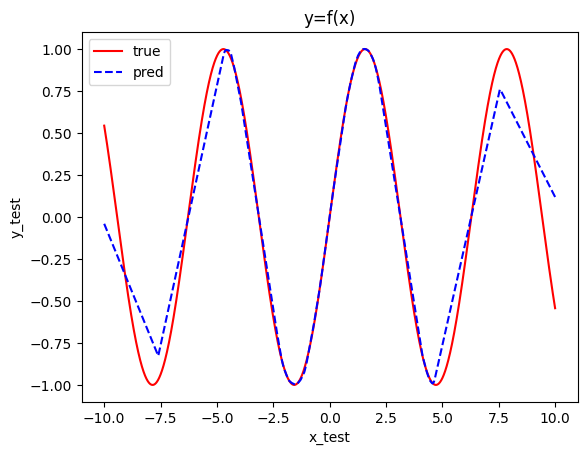

In [49]:
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy(), 'r-', label='true', )
plt.plot(x_test.detach().numpy(), logits.detach().numpy(), 'b--', label='pred')
plt.title('y=f(x)')
plt.legend()
plt.show()

In [50]:
class model_torch_2(nn.Module):
    def __init__(self):
        super(model_torch_2, self).__init__()
        self.layer1 = nn.Linear(1, 256)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(256, 256)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(256, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

In [51]:
from tqdm import tqdm

model = model_torch_2()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

for epoch in tqdm(range(1500)):
    model.train()
    logits = model(x_train)
    optimizer.zero_grad()
    loss = criterion(logits, y_train)
    loss.backward()
    optimizer.step()
    
    model.eval()
    logits = model(x_val)
    val_loss = criterion(logits, y_val)
    if epoch % 100 == 0:
        print('epoch', epoch, ': train loss', loss.detach().numpy(), ': val loss', val_loss.detach().numpy())

  0%|          | 2/1500 [00:00<03:11,  7.83it/s]

epoch 0 : train loss 1.6580646 : val loss 1.2791276


  7%|▋         | 102/1500 [00:14<03:05,  7.52it/s]

epoch 100 : train loss 0.22065996 : val loss 0.19328064


 13%|█▎        | 202/1500 [00:28<03:02,  7.12it/s]

epoch 200 : train loss 0.13835172 : val loss 0.0912305


 20%|██        | 302/1500 [00:42<02:54,  6.85it/s]

epoch 300 : train loss 0.08286288 : val loss 0.045382645


 27%|██▋       | 402/1500 [00:56<02:34,  7.10it/s]

epoch 400 : train loss 0.03448759 : val loss 0.0127131175


 33%|███▎      | 502/1500 [01:10<02:08,  7.76it/s]

epoch 500 : train loss 0.01384101 : val loss 0.007532684


 40%|████      | 602/1500 [01:23<01:59,  7.52it/s]

epoch 600 : train loss 0.0057956367 : val loss 0.0016135192


 47%|████▋     | 702/1500 [01:37<01:46,  7.52it/s]

epoch 700 : train loss 0.0043486506 : val loss 0.0029259042


 53%|█████▎    | 802/1500 [01:51<01:32,  7.51it/s]

epoch 800 : train loss 0.0016710949 : val loss 0.0005377373


 60%|██████    | 902/1500 [02:04<01:22,  7.27it/s]

epoch 900 : train loss 0.0013395961 : val loss 0.00047594035


 67%|██████▋   | 1002/1500 [02:18<01:09,  7.13it/s]

epoch 1000 : train loss 0.017365033 : val loss 0.011357627


 73%|███████▎  | 1102/1500 [02:32<00:55,  7.21it/s]

epoch 1100 : train loss 0.0006715972 : val loss 0.00027294084


 80%|████████  | 1202/1500 [02:46<00:41,  7.16it/s]

epoch 1200 : train loss 0.0036440368 : val loss 0.00057266344


 87%|████████▋ | 1302/1500 [02:59<00:27,  7.15it/s]

epoch 1300 : train loss 0.000534835 : val loss 0.00016494935


 93%|█████████▎| 1402/1500 [03:13<00:13,  7.45it/s]

epoch 1400 : train loss 0.0060160924 : val loss 0.0035906734


100%|██████████| 1500/1500 [03:27<00:00,  7.24it/s]


In [52]:
model.eval()
logits = model(x_test)
loss = criterion(logits, y_test)

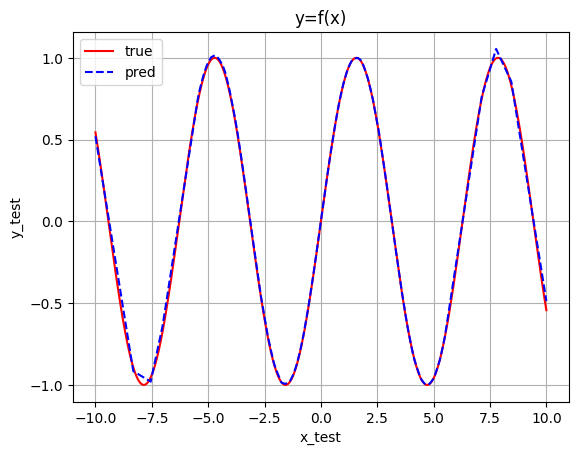

In [53]:
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy(), 'r-', label='true', )
plt.plot(x_test.detach().numpy(), logits.detach().numpy(), 'b--', label='pred')
plt.title('y=f(x)')
plt.grid()
plt.legend()
plt.show()

## 结论

两层Relu较一层Relu拟合效果更好，且拟合速度更快。